# Mental Health Statistical Analysis

- [Data Preprocessing](#Data-Preprocessing)
- [Mental Stress Score](#Mental-Stress-Score)
- [Statistical Analysis](#Statistical-Analysis)
  - [Comparing Stress Levels Across Gender](#1.-Comparing-Stress-Levels-Across-Gender)
  - [Comparing Stress Levels Across Different Years of Study](#2.-Comparing-Stress-Levels-Across-Different-Years-of-Study)
  - [Comparing Stress Levels Across Residential Status](#3.-Comparing-Stress-Levels-Across-Residential-Status)
  - [Comparing Stress Levels Across Different Courses](#4.-Comparing-Stress-Levels-Across-Different-Courses)
  - [Correlation between CGPA and Stress Scores](#5.-Correlation-between-CGPA-and-Stress-Scores)
  - [Comparing Stress Levels Across Different CGPA](#6.-Comparing-Stress-Levels-Across-Different-CGPA)
  - [Correlation between Sports and Stress Scores](#7.-Correlation-between-Sports-and-Stress-Scores)
  - [Comparing Stress Levels Across Sports Engagement](#8.-Comparing-Stress-Levels-Across-Sports-Engagement)
  - [Correlation between Sleep and Stress Scores](#9.-Correlation-between-Sleep-and-Stress-Scores)
  - [Comparing Stress Score Across Different Levels of Sleep](#10.-Comparing-Stress-Score-Across-Different-Levels-of-Sleep)
  - [Comparing Stress Levels Across Campus Mistreatment](#11.-Comparing-Stress-Levels-Across-Campus-Mistreatment)
  - [Association between Gender and Stress Relief Activities](#12.-Association-between-Gender-and-Stress-Relief-Activities)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind, pearsonr, chi2_contingency

In [2]:
file_path = "../Data/IT Student Mental Health Survey.csv"

df = pd.read_csv(file_path)

## Data Preprocessing

In [3]:
def drop_email_column_and_save(file_path):
    if 'Email' in df.columns:
        df.drop(['Email'], axis=1, inplace=True)
        df.to_csv(file_path, index=False)
        print(f"Column 'Email' dropped, and changes saved to {file_path}")
    else:
        print("Column 'Email' not found in the DataFrame")

drop_email_column_and_save(file_path)

Column 'Email' not found in the DataFrame


In [4]:
df.columns = [
    "Timestamp", "Gender", "Age", "University", "Degree Level", "Year", "Course", "CGPA", "Residential Status", 
    "Campus Mistreat", "Sports", "Sleep", "Field Satisfaction", "Uni Workload", "Academic Pressure", "Financial Pressure", 
    "Campus Networking", "Depression", "Anxiety", "Isolation", "Future Insecurity", "Stress Relief Activities", "Suggestions"
]

In [5]:
df.drop(
    columns=['Timestamp', 'Suggestions'], axis=1, inplace=True
)

In [6]:
df.head()

,Gender,Age,University,Degree Level,Year,Course,CGPA,Residential Status,Campus Mistreat,Sports,...,Field Satisfaction,Uni Workload,Academic Pressure,Financial Pressure,Campus Networking,Depression,Anxiety,Isolation,Future Insecurity,Stress Relief Activities
0,Male,20,PU,Undergraduate,2nd year,Data Science,3.0 - 3.5,Off-campus,No,Not at all,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections (Fami..."
1,Male,20,UET,Postgraduate,3rd year,Computer Science,3.0 - 3.5,Off-campus,No,1 - 3,...,5,4,4,1,3,3,3,3,4,"Entertainment (Watching movies, shows, gaming)"
2,Male,20,FAST,Undergraduate,3rd year,Computer Science,2.5 - 3.0,Off-campus,No,1 - 3,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Exercise and Fitness, En..."
3,Male,20,UET,Undergraduate,3rd year,Computer Science,2.5 - 3.0,On-campus (Hostelite),No,Not at all,...,3,5,4,4,1,5,5,5,3,"Entertainment (Watching movies, shows, gaming)"
4,Female,20,UET,Undergraduate,3rd year,Computer Science,3.0 - 3.5,Off-campus,Yes,Not at all,...,3,5,5,2,3,5,5,4,4,"Entertainment (Watching movies, shows, gaming)"


In [7]:
df.tail()

,Gender,Age,University,Degree Level,Year,Course,CGPA,Residential Status,Campus Mistreat,Sports,...,Field Satisfaction,Uni Workload,Academic Pressure,Financial Pressure,Campus Networking,Depression,Anxiety,Isolation,Future Insecurity,Stress Relief Activities
80,Female,21,PU,Undergraduate,4th year,Information Technology,3.5 - 4.0,Off-campus,Yes,Not at all,...,3,3,3,3,3,5,5,5,1,Sleep
81,Female,21,PU,Undergraduate,4th year,Information Technology,3.0 - 3.5,Off-campus,No,Not at all,...,3,4,4,3,4,4,4,2,4,"Entertainment (Watching movies, shows, gaming)..."
82,Male,22,PU,Undergraduate,4th year,Information Technology,2.5 - 3.0,Off-campus,No,Not at all,...,1,2,2,1,2,2,2,5,2,Religious Activities
83,Male,22,PU,Undergraduate,4th year,Information Technology,3.0 - 3.5,On-campus (Hostelite),No,Not at all,...,4,3,1,4,4,2,3,1,2,"Entertainment (Watching movies, shows, gaming)..."
84,Female,22,COMSATS,Undergraduate,4th year,Software Engineering,3.5 - 4.0,Off-campus,Yes,Not at all,...,5,5,5,5,1,5,5,5,5,"Religious Activities, Sleep"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    85 non-null     object
 1   Age                       85 non-null     object
 2   University                85 non-null     object
 3   Degree Level              85 non-null     object
 4   Year                      85 non-null     object
 5   Course                    85 non-null     object
 6   CGPA                      85 non-null     object
 7   Residential Status        85 non-null     object
 8   Campus Mistreat           85 non-null     object
 9   Sports                    85 non-null     object
 10  Sleep                     85 non-null     object
 11  Field Satisfaction        85 non-null     int64 
 12  Uni Workload              85 non-null     int64 
 13  Academic Pressure         85 non-null     int64 
 14  Financial Pressure        85

In [9]:
# Encoding categorical variables

column_mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Degree Level': {'Undergraduate': 0, 'Postgraduate': 1},
    'Year': {'1st year': 1, '2nd year': 2, '3rd year': 3, '4th year': 4},
    'Residential Status': {"Off-campus": 0, "On-campus (Hostelite)": 1},
    'Campus Mistreat': {"No": 0, "Yes": 1},
    
    "Sports": {"Not at all": 1, "1 - 3": 2, "4 - 6": 3, "More than 7": 4},
    "Sleep": {"Less than 4": 1, "4 - 6": 2, "7 - 8": 3, "More than 9": 4},
    "CGPA": {
        "3.5 - 4.0": 3.5,
        "3.0 - 3.5": 3.0,
        "2.5 - 3.0": 2.5,
        "2.0 - 2.5": 2.0,
        "Below 2.0": 1.5,
        "Not Applicable (1st semester)": 0
    }
}


for column, mapping in column_mappings.items():
    df[column] = df[column].map(mapping)


In [10]:
df.head()

,Gender,Age,University,Degree Level,Year,Course,CGPA,Residential Status,Campus Mistreat,Sports,...,Field Satisfaction,Uni Workload,Academic Pressure,Financial Pressure,Campus Networking,Depression,Anxiety,Isolation,Future Insecurity,Stress Relief Activities
0,0,20,PU,0,2,Data Science,3.0,0,0,1,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections (Fami..."
1,0,20,UET,1,3,Computer Science,3.0,0,0,2,...,5,4,4,1,3,3,3,3,4,"Entertainment (Watching movies, shows, gaming)"
2,0,20,FAST,0,3,Computer Science,2.5,0,0,2,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Exercise and Fitness, En..."
3,0,20,UET,0,3,Computer Science,2.5,1,0,1,...,3,5,4,4,1,5,5,5,3,"Entertainment (Watching movies, shows, gaming)"
4,1,20,UET,0,3,Computer Science,3.0,0,1,1,...,3,5,5,2,3,5,5,4,4,"Entertainment (Watching movies, shows, gaming)"


In [11]:
# Indexes 20 and 57 have outliers

df.loc[20, 'Age'], df.loc[57, 'Age']

('2', '270 years 12 minutes 9 seconds')

In [12]:
# Handling outliers in the 'Age' column and adjusting data types

lower_bound = 15
upper_bound = 30

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Age'] = df['Age'].apply(
    lambda x: df['Age'].mean() if pd.isna(x) or not (lower_bound <= x <= upper_bound) else x
)

df['Age'] = df['Age'].astype('int32')

In [13]:
df.loc[20, 'Age'], df.loc[57, 'Age']

(19, 19)

In [14]:
# Reverse coding on field satisfaction to measure stress

df['Field Stress'] = 6 - df['Field Satisfaction']

In [15]:
# Processing outliers and handling categorical labels for 'Stress Relief Activities' column

activities = {
    'Religious Activities': 'Religious',
    'Exercise and Fitness': 'Fitness',
    'Creative Outlets (Painting, Photography, Music)': 'Creative Outlets',
    'Social Connections (Family or Friends activities)': 'Social Connections',
    'Entertainment (Watching movies, shows, gaming)': 'Entertainment',
    'Outdoor Activities (Sports)': 'Outdoor',
    'Sleep': 'Sleep'
}

def remove_outliers(data):
    result = data.split(', ')
    result = [x for x in result if x in activities.values()]
    return result

def rename_activities(data):
    result = data
    for activity in activities:
        if activity in result:
            result = result.replace(activity, activities[activity])
    return remove_outliers(result)


In [16]:
df['Stress Relief Activities'] = df['Stress Relief Activities'].apply(rename_activities)

In [17]:
df['Stress Relief Activities']

0     [Religious, Social Connections, Entertainment]
1                                    [Entertainment]
2                [Religious, Fitness, Entertainment]
3                                    [Entertainment]
4                                    [Entertainment]
                           ...                      
80                                           [Sleep]
81                            [Entertainment, Sleep]
82                                       [Religious]
83                   [Entertainment, Outdoor, Sleep]
84                                [Religious, Sleep]
Name: Stress Relief Activities, Length: 85, dtype: object

## Mental Stress Score

In [18]:
stress_features = [
    "Field Stress", "Uni Workload", "Financial Pressure", "Depression", "Anxiety", "Isolation", "Future Insecurity"
]

df[stress_features].head()

,Field Stress,Uni Workload,Financial Pressure,Depression,Anxiety,Isolation,Future Insecurity
0,1,4,4,2,1,1,2
1,1,4,1,3,3,3,4
2,1,5,3,2,3,3,1
3,3,5,4,5,5,5,3
4,3,5,2,5,5,4,4


In [19]:
df[stress_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Field Stress        85 non-null     int64
 1   Uni Workload        85 non-null     int64
 2   Financial Pressure  85 non-null     int64
 3   Depression          85 non-null     int64
 4   Anxiety             85 non-null     int64
 5   Isolation           85 non-null     int64
 6   Future Insecurity   85 non-null     int64
dtypes: int64(7)
memory usage: 4.8 KB


In [20]:
df["Stress Score"] = df[stress_features].sum(axis=1)

In [21]:
features = stress_features+["Stress Score"]

df[features].head()

,Field Stress,Uni Workload,Financial Pressure,Depression,Anxiety,Isolation,Future Insecurity,Stress Score
0,1,4,4,2,1,1,2,15
1,1,4,1,3,3,3,4,19
2,1,5,3,2,3,3,1,18
3,3,5,4,5,5,5,3,30
4,3,5,2,5,5,4,4,28


In [22]:
df['Stress Score'].min(), df['Stress Score'].max()

(8, 34)

In [23]:
# Calculating z scores
stress_scores = df['Stress Score']

mean = np.mean(stress_scores)
std = np.std(stress_scores)
z_scores = (stress_scores - mean) / std

print(f"Mean: {mean}\nStandard Deviation: {std}")

print(f"Z-scores:\n{z_scores[:5]}")

Mean: 22.16470588235294
Standard Deviation: 5.816501998772983
Z-scores:
0   -1.231789
1   -0.544091
2   -0.716016
3    1.347080
4    1.003231
Name: Stress Score, dtype: float64


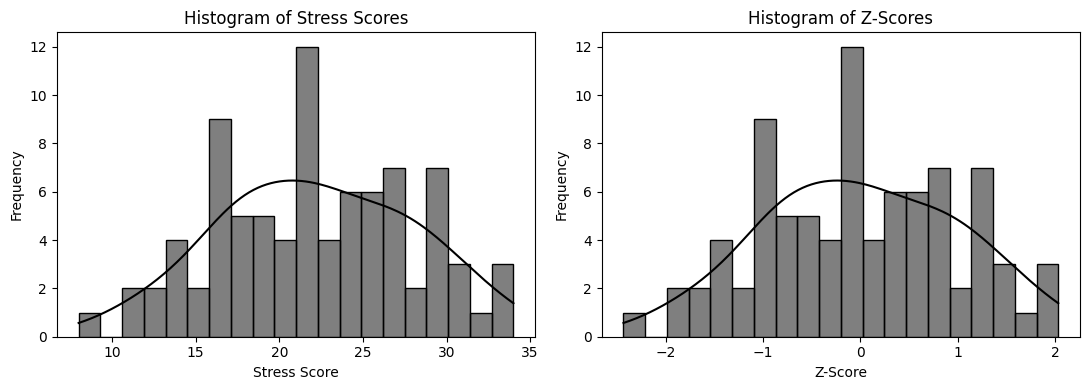

In [24]:
plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Stress Score'], bins=20, kde=True, color='black')
plt.title('Histogram of Stress Scores')
plt.xlabel('Stress Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(z_scores, bins=20, kde=True, color='black')
plt.title('Histogram of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
"""
Low Stress:      below the 25th percentile or less than 1 standard deviation.
Moderate Stress: between the 25th and 75th percentiles or within 1 standard deviation above and below the mean.
High Stress:     above the 75th percentile or more than 1 standard deviation.
"""
def classify_stress_level(z_score):
    if z_score < -1:
        # low stress
        return 0
    elif -1 <= z_score <= 1:
        # moderate stress
        return 1
    else:
        # high stress
        return 2

In [26]:
df['Stress Level'] = z_scores.apply(classify_stress_level)

In [27]:
final_stress = features + ["Stress Level"]

df[final_stress].head()

,Field Stress,Uni Workload,Financial Pressure,Depression,Anxiety,Isolation,Future Insecurity,Stress Score,Stress Level
0,1,4,4,2,1,1,2,15,0
1,1,4,1,3,3,3,4,19,1
2,1,5,3,2,3,3,1,18,1
3,3,5,4,5,5,5,3,30,2
4,3,5,2,5,5,4,4,28,2


In [28]:
df.to_csv('../Data/Mental Health Cleaned Data.csv', index=False)

## Statistical Analysis

1. [Comparing Stress Levels Across Gender](#1.-Comparing-Stress-Levels-Across-Gender)
2. [Comparing Stress Levels Across Different Years of Study](#2.-Comparing-Stress-Levels-Across-Different-Years-of-Study)
3. [Comparing Stress Levels Across Residential Status](#3.-Comparing-Stress-Levels-Across-Residential-Status)
4. [Comparing Stress Levels Across Different Courses](#4.-Comparing-Stress-Levels-Across-Different-Courses)
5. [Correlation between CGPA and Stress Scores](#5.-Correlation-between-CGPA-and-Stress-Scores)
6. [Comparing Stress Levels Across Different CGPA](#6.-Comparing-Stress-Levels-Across-Different-CGPA)
7. [Correlation between Sports and Stress Scores](#7.-Correlation-between-Sports-and-Stress-Scores)
8. [Comparing Stress Levels Across Sports Engagement](#8.-Comparing-Stress-Levels-Across-Sports-Engagement)
9. [Correlation between Sleep and Stress Scores](#9.-Correlation-between-Sleep-and-Stress-Scores)
10. [Comparing Stress Score Across Different Levels of Sleep](#10.-Comparing-Stress-Score-Across-Different-Levels-of-Sleep)
11. [Comparing Stress Levels Across Campus Mistreatment](#11.-Comparing-Stress-Levels-Across-Campus-Mistreatment)
12. [Association between Gender and Stress Relief Activities](#12.-Association-between-Gender-and-Stress-Relief-Activities)

### 1. Comparing Stress Levels Across Gender

In [29]:
gender_count = df.groupby('Gender').size()

gender_count

Gender
0    62
1    23
dtype: int64

In [30]:
null_hypo = "No significant differences in stress scores between male and female participants."
alt_hypo = "There are significant differences in stress scores between male and female participants."

male = df[df['Gender'] == 0]['Stress Score']
female = df[df['Gender'] == 1]['Stress Score']

t_statistic, p_value = ttest_ind(male, female, equal_var=False)

print("T-test Result:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.", alt_hypo)
else:
    print("Fail to reject the null hypothesis.", null_hypo)

T-test Result:
T-statistic: -1.1015534378685883
P-value: 0.27774854844715907
Fail to reject the null hypothesis. No significant differences in stress scores between male and female participants.


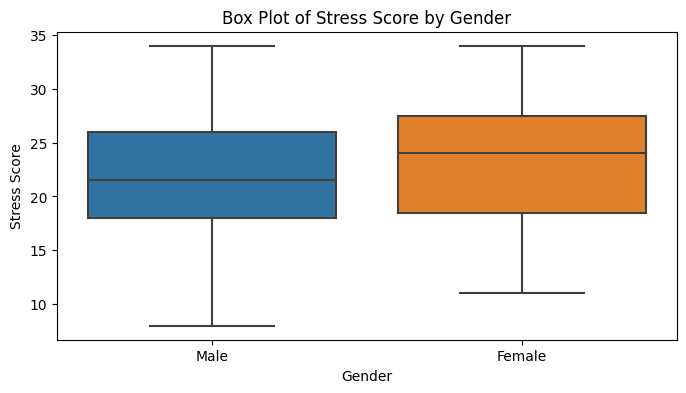

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Gender', y='Stress Score', data=df)

plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

plt.title('Box Plot of Stress Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Score')

plt.show()

### 2. Comparing Stress Levels Across Different Years of Study

In [32]:
result = f_oneway(
    df[df['Year'] == 1]['Stress Score'],
    df[df['Year'] == 2]['Stress Score'],
    df[df['Year'] == 3]['Stress Score'],
    df[df['Year'] == 4]['Stress Score']
)

print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores among the groups.")
else:
    print("Fail to reject the null hypothesis. No significant differences in stress scores among the groups.")


ANOVA Result:
F-statistic: 3.895457779989194
P-value: 0.011819017188762278
Reject the null hypothesis. There are significant differences in stress scores among the groups.


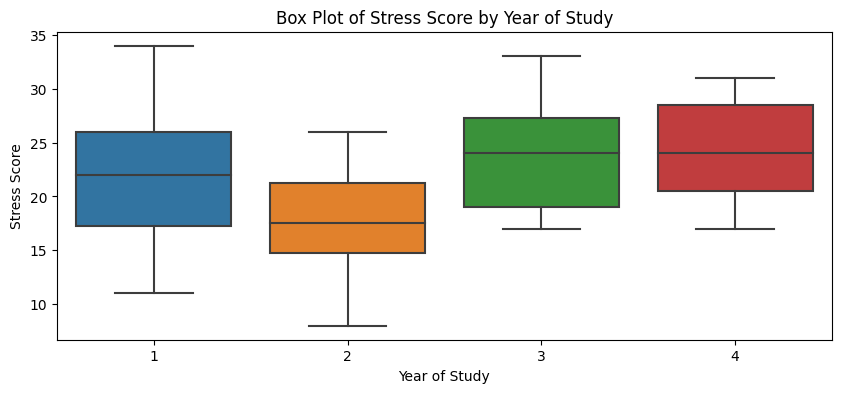

In [33]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Year', y='Stress Score', data=df)

plt.title('Box Plot of Stress Score by Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Stress Score')

plt.show()

### 3. Comparing Stress Levels Across Residential Status

In [34]:
result = f_oneway(
    df[df['Residential Status'] == 0]['Stress Score'],
    df[df['Residential Status'] == 1]['Stress Score']
)

print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores between On-Campus and Off-Campus residents.")
else:
    print("Fail to reject the null hypothesis. No significant differences in stress scores between On-Campus and Off-Campus residents.")

ANOVA Result:
F-statistic: 0.0043359322459198
P-value: 0.9476573516985695
Fail to reject the null hypothesis. No significant differences in stress scores between On-Campus and Off-Campus residents.


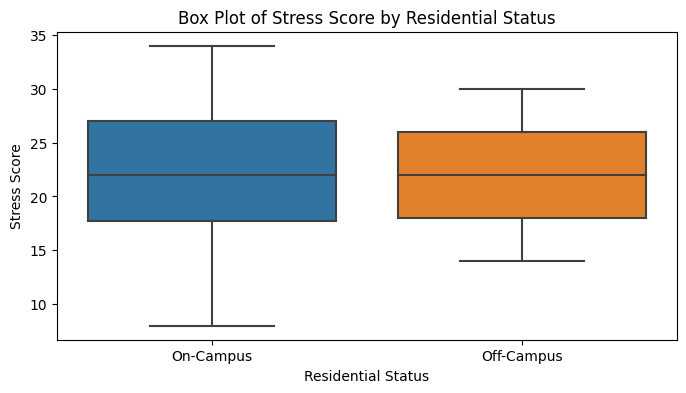

In [35]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Residential Status', y='Stress Score', data=df)

plt.xticks(ticks=[0, 1], labels=['On-Campus', 'Off-Campus'])

plt.title('Box Plot of Stress Score by Residential Status')
plt.xlabel('Residential Status')
plt.ylabel('Stress Score')

plt.show()

### 4. Comparing Stress Levels Across Different Courses

In [36]:
result = f_oneway(
    df[df['Course'] == 'Computer Science']['Stress Score'],
    df[df['Course'] == 'Software Engineering']['Stress Score'],
    df[df['Course'] == 'Information Technology']['Stress Score'],
    df[df['Course'] == 'Data Science']['Stress Score'],
)


print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores among courses.")
else:
    print("Fail to reject the null hypothesis. No significant differences in stress scores among courses.")

ANOVA Result:
F-statistic: 3.7003080955596777
P-value: 0.015091457629413607
Reject the null hypothesis. There are significant differences in stress scores among courses.


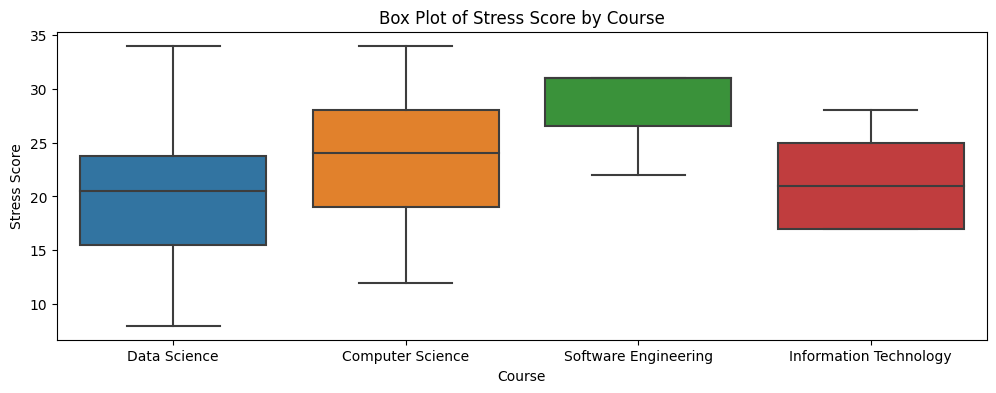

In [37]:
courses = ['Computer Science', 'Software Engineering', 'Information Technology', 'Data Science']

plt.figure(figsize=(12, 4))
sns.boxplot(x='Course', y='Stress Score', data=df[df['Course'].isin(courses)])

plt.title('Box Plot of Stress Score by Course')
plt.xlabel('Course')
plt.ylabel('Stress Score')

plt.show()

### 5. Correlation between CGPA and Stress Scores

In [38]:
correlation_coefficient, p_value = pearsonr(df['CGPA'], df['Stress Score'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between CGPA and Stress Score.")
    if correlation_coefficient > 0:
        print("The correlation is positive, indicating that higher CGPA is associated with higher stress.")
    else:
        print("The correlation is negative, indicating that higher CGPA is associated with lower stress.")
else:
    print("There is no significant correlation between CGPA and Stress Score.")

Pearson Correlation Coefficient: -0.02821325321261866
P-value: 0.7977091444232983
There is no significant correlation between CGPA and Stress Score.


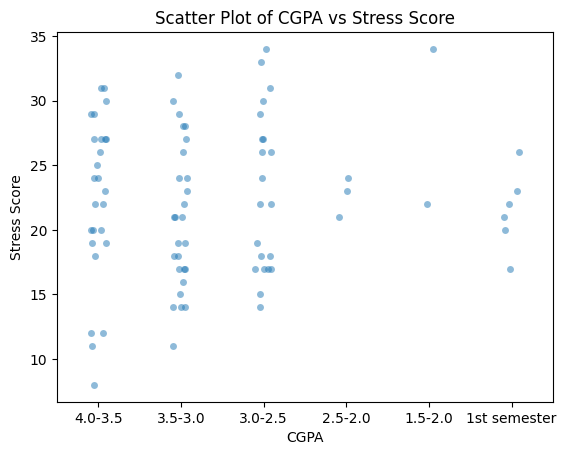

In [39]:
labels = ['4.0-3.5', '3.5-3.0', '3.0-2.5', '2.5-2.0', '1.5-2.0', '1st semester']
cgpa_order = [3.5, 3.0, 2.5, 2.0, 1.5, 0.0]

sns.stripplot(x='CGPA', y='Stress Score', data=df, order=cgpa_order, jitter=True, alpha=0.5)

plt.xticks(ticks=range(len(cgpa_order)), labels=labels)

plt.title('Scatter Plot of CGPA vs Stress Score')
plt.xlabel('CGPA')
plt.ylabel('Stress Score')
plt.show()

### 6. Comparing Stress Levels Across Different CGPA

In [40]:
f_statistic, p_value = f_oneway(
    df[df['CGPA'] == 3.5]['Stress Score'],
    df[df['CGPA'] == 3.0]['Stress Score'],
    df[df['CGPA'] == 2.5]['Stress Score'],
    df[df['CGPA'] == 2.0]['Stress Score'],
    df[df['CGPA'] == 1.5]['Stress Score'],
    df[df['CGPA'] == 0.0]['Stress Score'],
)

print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores among CGPA groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences in stress scores among CGPA groups.")

ANOVA Test Results:
F-statistic: 0.744040023534928
P-value: 0.5928400271559513
Fail to reject the null hypothesis. There are no significant differences in stress scores among CGPA groups.


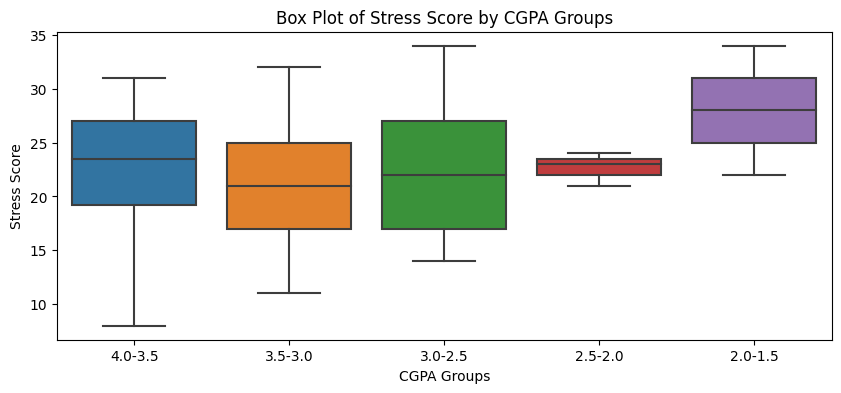

In [41]:
plt.figure(figsize=(10, 4))

sns.boxplot(x='CGPA', y='Stress Score', data=df, order=[3.5, 3.0, 2.5, 2.0, 1.5])

xticklabels = ['4.0-3.5', '3.5-3.0', '3.0-2.5', '2.5-2.0', '2.0-1.5']
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels)

plt.title('Box Plot of Stress Score by CGPA Groups')
plt.xlabel('CGPA Groups')
plt.ylabel('Stress Score')

plt.show()

### 7. Correlation between Sports and Stress Scores

In [42]:
correlation, p_value = pearsonr(df['Sports'], df['Stress Score'])

print("Pearson's Correlation Coefficient:", correlation)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Sports and Stress Score.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Sports and Stress Score.")

Pearson's Correlation Coefficient: -0.20215503379634056
P-value: 0.06354092823394786
Fail to reject the null hypothesis. There is no significant correlation between Sports and Stress Score.


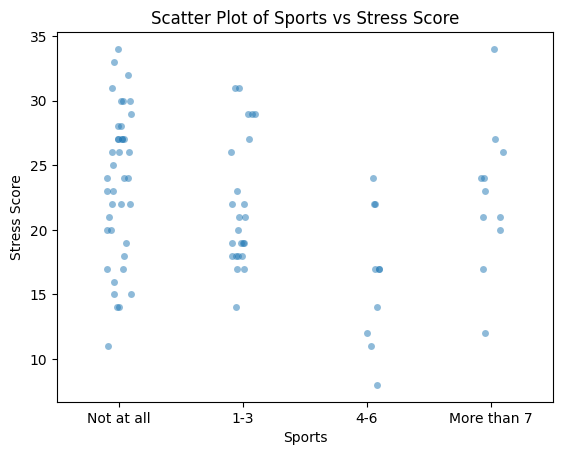

In [43]:
labels = ['Not at all', '1-3', '4-6', 'More than 7']
sports_order = [1, 2, 3, 4]

sns.stripplot(x='Sports', y='Stress Score', data=df, order=sports_order, jitter=True, alpha=0.5)

plt.xticks(ticks=range(len(sports_order)), labels=labels)

plt.title('Scatter Plot of Sports vs Stress Score')
plt.xlabel('Sports')
plt.ylabel('Stress Score')

plt.show()

### 8. Comparing Stress Levels Across Sports Engagement

In [44]:
f_statistic, p_value = f_oneway(
    df[df['Sports'] == 1]['Stress Score'],
    df[df['Sports'] == 2]['Stress Score'],
    df[df['Sports'] == 3]['Stress Score'],
    df[df['Sports'] == 4]['Stress Score']
)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores among different levels of sports engagement.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences in stress scores among different levels of sports engagement.")

F-statistic: 4.594556052948892
P-value: 0.005075184415930172
Reject the null hypothesis. There are significant differences in stress scores among different levels of sports engagement.


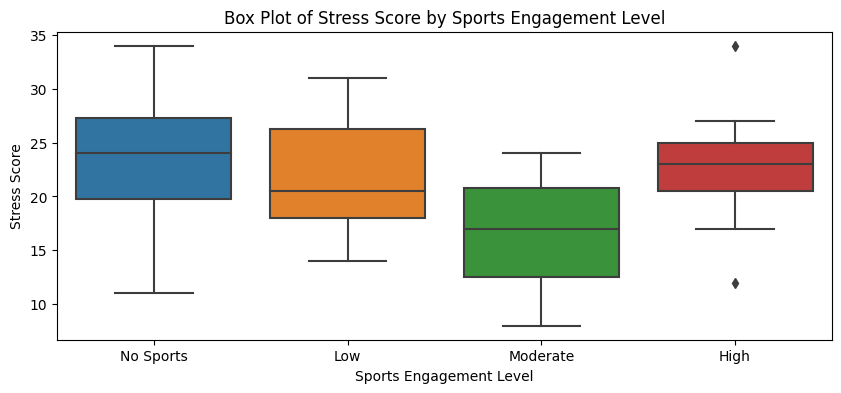

In [45]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Sports', y='Stress Score', data=df)

xticklabels = ['No Sports', 'Low', 'Moderate', 'High']
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels)

plt.title('Box Plot of Stress Score by Sports Engagement Level')
plt.xlabel('Sports Engagement Level')
plt.ylabel('Stress Score')

plt.show()

### 9. Correlation between Sleep and Stress Scores

In [46]:
correlation, p_value = pearsonr(df['Sleep'], df['Stress Score'])

print("Pearson's Correlation Coefficient:", correlation)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Sleep and Stress Score.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Sleep and Stress Score.")

Pearson's Correlation Coefficient: -0.30275519953284663
P-value: 0.004857188935944013
Reject the null hypothesis. There is a significant correlation between Sleep and Stress Score.


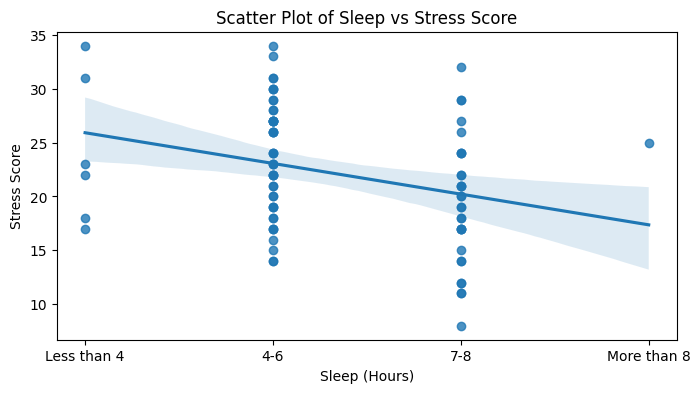

In [47]:
plt.figure(figsize=(8, 4))
sns.regplot(x='Sleep', y='Stress Score', data=df)

plt.xticks(ticks=[1, 2, 3, 4], labels=['Less than 4', '4-6', '7-8', 'More than 8'])

plt.title('Scatter Plot of Sleep vs Stress Score')
plt.xlabel('Sleep (Hours)')
plt.ylabel('Stress Score')

plt.show()

### 10. Comparing Stress Score Across Different Levels of Sleep

In [48]:
result = f_oneway(
    df[df['Sleep'] == 1]['Stress Score'],
    df[df['Sleep'] == 2]['Stress Score'],
    df[df['Sleep'] == 3]['Stress Score'],
    df[df['Sleep'] == 4]['Stress Score'],
)

print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)


alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores among different levels of sleep.")
else:
    print("Fail to reject the null hypothesis. No significant differences in stress scores among different levels of sleep.")

ANOVA Result:
F-statistic: 4.102272072794882
P-value: 0.009194412906935932
Reject the null hypothesis. There are significant differences in stress scores among different levels of sleep.


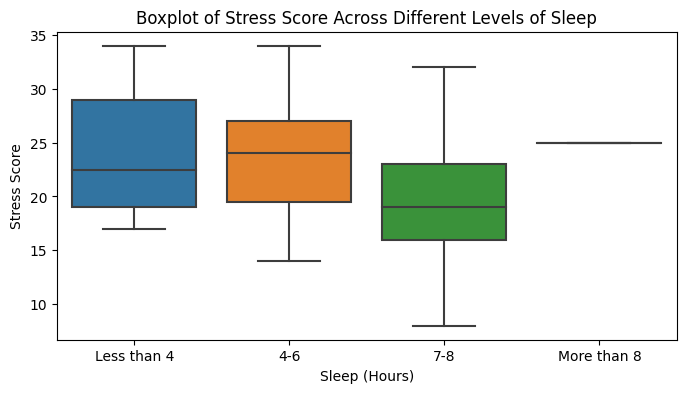

In [49]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sleep', y='Stress Score', data=df)

plt.xticks(ticks=[0, 1, 2, 3], labels=['Less than 4', '4-6', '7-8', 'More than 8'])

plt.title('Boxplot of Stress Score Across Different Levels of Sleep')
plt.xlabel('Sleep (Hours)')
plt.ylabel('Stress Score')

plt.show()

### 11. Comparing Stress Levels Across Campus Mistreatment

In [50]:
group_0 = df[df['Campus Mistreat'] == 0]['Stress Score']
group_1 = df[df['Campus Mistreat'] == 1]['Stress Score']

t_statistic, p_value = ttest_ind(group_0, group_1, equal_var=False)

print("Independent Samples T-test Result:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences in stress scores between groups with and without campus mistreatment.")
else:
    print("Fail to reject the null hypothesis. No significant differences in stress scores between groups with and without campus mistreatment.")

Independent Samples T-test Result:
T-statistic: -1.929535243812165
P-value: 0.062209251297221844
Fail to reject the null hypothesis. No significant differences in stress scores between groups with and without campus mistreatment.


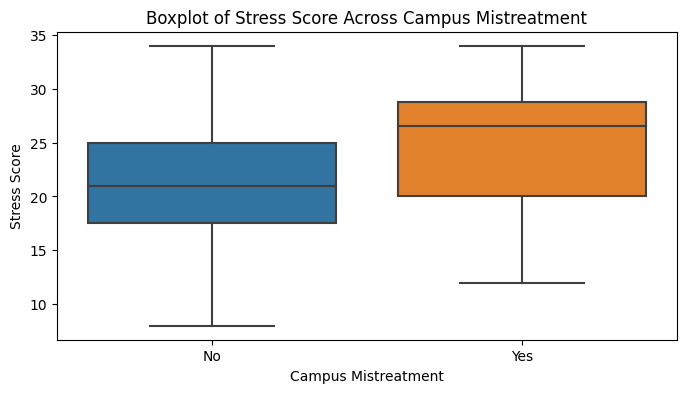

In [51]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Campus Mistreat', y='Stress Score', data=df)

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.title('Boxplot of Stress Score Across Campus Mistreatment')
plt.xlabel('Campus Mistreatment')
plt.ylabel('Stress Score')

plt.show()

### 12. Association between Gender and Stress Relief Activities

In [52]:
df1 = df[['Gender', 'Stress Relief Activities']]
df1 = df1.explode('Stress Relief Activities')
contingency_table = pd.crosstab(df1['Gender'], df1['Stress Relief Activities'])

contingency_table

Stress Relief Activities,Creative Outlets,Entertainment,Fitness,Outdoor,Religious,Sleep,Social Connections
Gender,,,,,,,
0,7,31,19,19,34,11,24
1,4,6,0,0,12,7,9


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 84
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    185 non-null    int64 
 1   Stress Relief Activities  183 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [54]:
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Test Result:")
print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between Gender and Stress Relief Activities.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Gender and Stress Relief Activities.")

Chi-square Test Result:
Chi2 Statistic: 17.28549324523048
P-value: 0.008289343173142859
Reject the null hypothesis. There is a significant association between Gender and Stress Relief Activities.


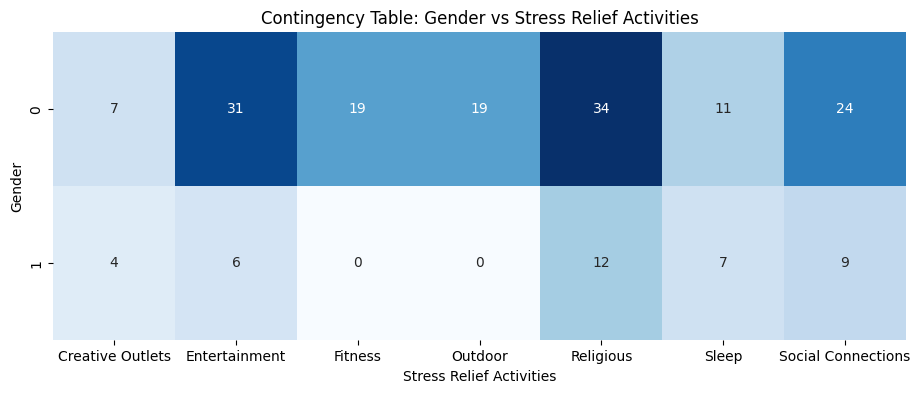

In [55]:
plt.figure(figsize=(11, 4))
ax = sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title('Contingency Table: Gender vs Stress Relief Activities')
plt.xlabel('Stress Relief Activities')
plt.ylabel('Gender')

plt.show()